In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import randint  # Import randint for random integer sampling
from scipy.stats import uniform # Import uniform values for random integer sampling

# prep
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

#Validation Libraries
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

#bagging and boosting
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

#neural networks
import tensorflow as tf
import argparse
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import RandomizedSearchCV 



# Main purpose of this study : 

**Can you predict whether a patient should be treated of his/her mental illness or not according to the values obtained in the dataset?**

## Part - 1 : First contact with the dataset

In [2]:
# Loading the dataset : 
df = pd.read_csv('data/survey.csv')

**Observing the dataset :**

In [3]:
# Observing the first few rows : 
df.head(5) # first five rows 

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
# Observing the last few rows : 
df.tail(5)  # last five rows

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [5]:
# Observing a random samples from the dataset : 
df.sample(5) # five random samples

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
183,2014-08-27 12:51:55,45,M,United States,CA,No,No,Yes,Sometimes,More than 1000,...,Don't know,Yes,Yes,Some of them,Some of them,No,No,Don't know,No,NaN
1132,2014-08-31 16:48:13,36,F,United States,TN,No,Yes,Yes,Rarely,More than 1000,...,Somewhat easy,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
527,2014-08-27 17:33:52,51,Male,New Zealand,NaN,No,No,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,Yes,No,No,No,No,Don't know,Yes,NaN
79,2014-08-27 12:00:02,28,m,Germany,NaN,No,No,No,Never,6-25,...,Very easy,No,No,Some of them,Some of them,Maybe,Yes,Yes,No,NaN
394,2014-08-27 15:24:56,24,female,United States,TX,No,Yes,No,NaN,500-1000,...,Very difficult,Yes,Maybe,No,No,No,Maybe,No,Yes,NaN


**General information about the dataset :**

In [6]:
# dimension of the dataset : 
print(f'number of features : {df.shape[1]}')
print(f'number of rows : {df.shape[0]}')

number of features : 27
number of rows : 1259


In [7]:
# Extensive info about the dataset : 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [8]:
# Summary statistics of numerical features ; 
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


## Part - 2 : Data cleaning

**Inspecting missing data :**

In [9]:
# Total number of missing data for each feature : 
total = df.isnull().sum().sort_values(ascending=False)

# Total number of missing data for each feature as a percentage :
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

# Combining the two Series into one dataframe : 
missing_data = pd.concat([total, round(percent , 2)], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)


,Total,Percent
comments,1095,0.87
state,515,0.41
work_interfere,264,0.21
self_employed,18,0.01
seek_help,0,0.00


**Dropping unnecessary features :**

In [10]:
# Dropping the columns which appear to have a weak relationship with the target : 
df = df.drop(['comments'], axis= 1)
df = df.drop(['state'], axis= 1)
df = df.drop(['Timestamp'], axis= 1)

df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


**Filling missing values with standard values :**

In [11]:
# Assigning default values for each data-type
default_values = {
    'int': 0,
    'string': 'NaN',
    'float': 0.0
}

# Split features by data-type
features_by_type = {
    'int': ['Age'],
    'string': ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
               'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
               'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
               'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program', 'seek_help'],
    'float': []
}

# Filling missing values using the two dictionaries
# Iterating over all the features of the dataframe
for feature in df:
    # Initialize a flag to check if feature is recognized
    recognized = False
    
    # Iterating over datatypes and their corresponding features
    for dtype, features in features_by_type.items():
        # Checking if the selected feature falls in a data-type category
        if feature in features:
            # Filling any missing values with the default value and reassigning it to the DataFrame
            df[feature] = df[feature].fillna(default_values[dtype])
            recognized = True
            break

    if not recognized:
        print(f'Feature: {feature} is not recognized.')

df.head(5)


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


**Handling the gender feature :**

The gender is full of inconsistencies and many unnecessary values.

Text(0, 0.5, 'frequency')

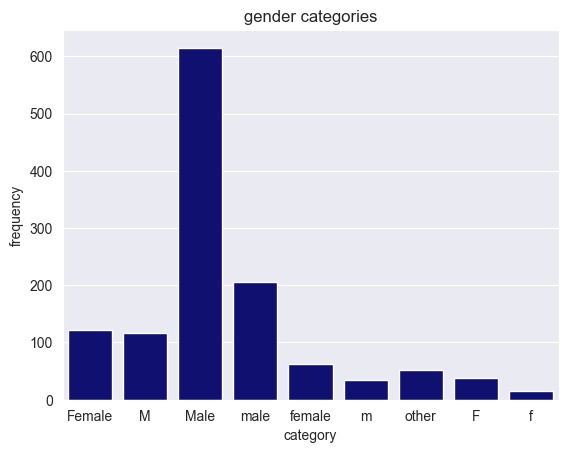

In [12]:
# Setting a trehsold frequency : 
tresh = 10 
# Retreiving the frequency of each value present in Gender :
gender_counts = df['Gender'].value_counts() 
# Filtering rare categories : 
rare_categories = gender_counts[gender_counts < tresh].index 
# Extracting a series to visualize it : 
gender_series = df['Gender'].replace(rare_categories , "other")

sns.set_style('darkgrid')
sns.countplot(x= gender_series , color= 'navy')
plt.title('gender categories')
plt.xlabel('category')
plt.ylabel('frequency')


In [13]:
# Define the mapping of values to standardized gender categories
gender_mapping = {
    'male': ['male', 'm', 'male-ish', 'maile', 'mal', 'male (cis)', 'make', 'male ', 'man', 'msle', 'mail', 'malr', 'cis man', 'Cis Male', 'cis male'],
    'female': ['cis female', 'f', 'female', 'woman', 'femake', 'female ', 'cis-female/femme', 'female (cis)', 'femail']
}

# Create a reverse mapping for quick look-up
reverse_mapping = {v : k for k, values in gender_mapping.items() for v in values}

# Lowercase all entries in the Gender column
df['Gender'] = df['Gender'].str.lower()

# Print original unique values
print("Original unique Gender values:", df['Gender'].unique())

# Replace values based on the mapping
df['Gender'] = df['Gender'].replace(reverse_mapping)

# Print unique values after mapping
print("After mapping:", df['Gender'].unique())

# Unify all non-male/female entries into "unknown"
df['Gender'] = df['Gender'].where(df['Gender'].isin(['male', 'female']), other='unknown')

# Remove unwanted entries (if you want to drop them instead of labeling as 'unknown')
stk_list = ['a little about you', 'p']
df = df[~df['Gender'].isin(stk_list)]

# Display unique values in the cleaned Gender column
print("Final unique Gender values:", df['Gender'].unique())

Original unique Gender values: ['female' 'm' 'male' 'male-ish' 'maile' 'trans-female' 'cis female' 'f'
 'something kinda male?' 'cis male' 'woman' 'mal' 'male (cis)'
 'queer/she/they' 'non-binary' 'femake' 'make' 'nah' 'all' 'enby' 'fluid'
 'genderqueer' 'female ' 'androgyne' 'agender' 'cis-female/femme'
 'guy (-ish) ^_^' 'male leaning androgynous' 'male ' 'man' 'trans woman'
 'msle' 'neuter' 'female (trans)' 'queer' 'female (cis)' 'mail'
 'a little about you' 'malr' 'p' 'femail' 'cis man'
 'ostensibly male, unsure what that really means']
After mapping: ['female' 'male' 'trans-female' 'something kinda male?' 'queer/she/they'
 'non-binary' 'nah' 'all' 'enby' 'fluid' 'genderqueer' 'androgyne'
 'agender' 'guy (-ish) ^_^' 'male leaning androgynous' 'trans woman'
 'neuter' 'female (trans)' 'queer' 'a little about you' 'p'
 'ostensibly male, unsure what that really means']
Final unique Gender values: ['female' 'male' 'unknown']


Text(0, 0.5, 'frequency')

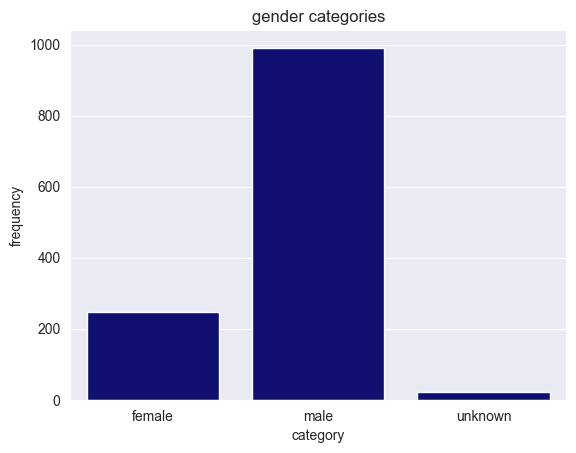

In [14]:
sns.set_style('darkgrid')
sns.countplot(x='Gender' ,data= df , color= 'navy')
plt.title('gender categories')
plt.xlabel('category')
plt.ylabel('frequency')


In [15]:
# Droping entries with unknown gender and replacing nan values with male since the majority are males : 
df['Gender'] = df.loc[~(df['Gender'] == 'unknown') , 'Gender']
df['Gender'] = df['Gender'].replace(to_replace= pd.NA , value='male')
df['Gender'].unique()

array(['female', 'male'], dtype=object)

**Handling the age:**

The age contains outliers, which can cause problems during the training processes.

In [16]:
# the median of the age sequence : 
median_age = df['Age'].median() 
#  filling outlier values with the median age : 
df['Age'] = df['Age'].apply(lambda x : median_age if (x < 18 or x > 70) else x )
# Adding an age range feature : 
df['Age_range'] = pd.cut(df['Age'], [0, 20, 30, 55 , 70 ], labels=["18-20", "20-30", "30-55", "55-70"], include_lowest=True)

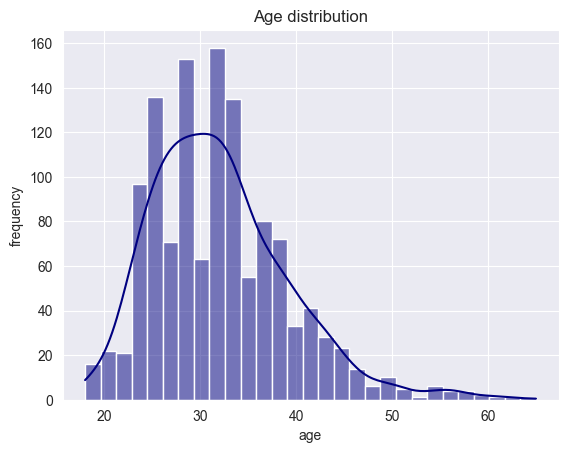

In [17]:
# Let's visualize the age distribution :
sns.set_style('darkgrid') 
sns.histplot( x =  'Age' , data = df , kde = True , fill = True , color = 'navy')
plt.title('Age distribution')
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

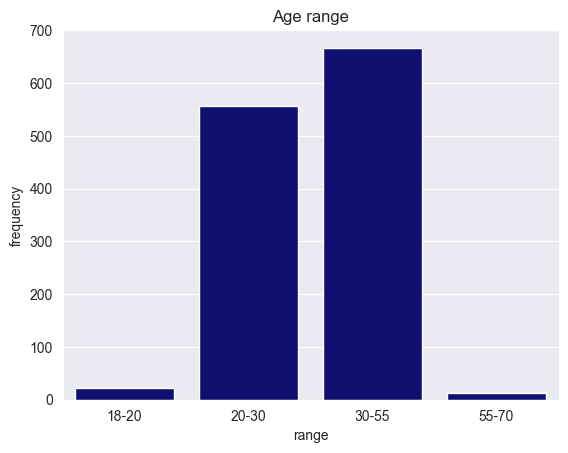

In [18]:
# Let's visualize the age distribution :
sns.set_style('darkgrid') 
sns.countplot( x =  'Age_range' , data = df , color = 'navy' )
plt.title('Age range')
plt.xlabel('range')
plt.ylabel('frequency')
plt.show()

In [19]:
df = df.iloc[: , : -1] #Removing the age range feature

**Handling self employement and mental health interference with work features :**

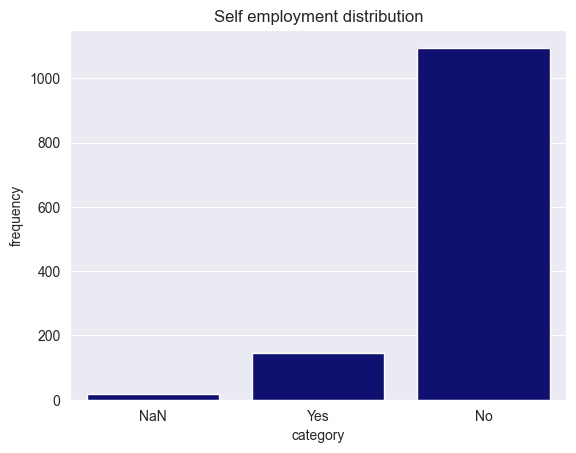

In [20]:
# Let's first inspect the distribution of the feature : 
sns.set_style('darkgrid') 
sns.countplot( x =  'self_employed' , data = df , color = 'navy' )
plt.title('Self employment distribution')
plt.xlabel('category')
plt.ylabel('frequency')
plt.show()

In [21]:
# We notice that self employment rate is very small : 
condition = ( df['self_employed'] == 'Yes')
df_filtered = df.loc[condition , 'self_employed']
self_empl_rate = (df_filtered.count() / df['self_employed'].count())
print(f'the rate of self employement is : {round( self_empl_rate * 100, 3)} %')

the rate of self employement is : 11.597 %


In [22]:
# It is safe to assume that the rest of NaN values are not self employed : 
df['self_employed'] = df['self_employed'].apply(lambda x : 'No' if (x == 'NaN') else x)
df['self_employed'].value_counts()

self_employed
No     1113
Yes     146
Name: count, dtype: int64

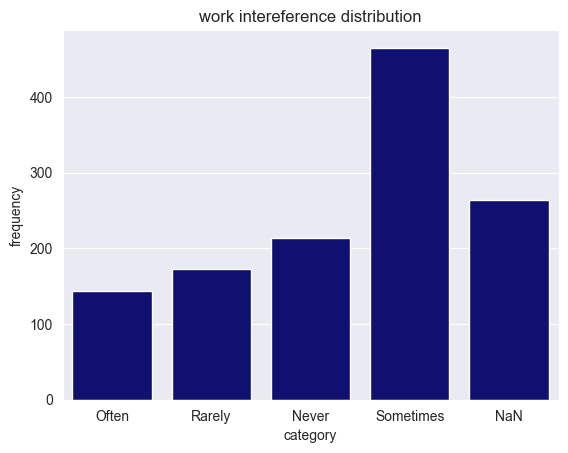

In [23]:
# Let's  inspect the distribution of work interfere feature  : 
sns.set_style('darkgrid') 
sns.countplot( x =  'work_interfere' , data = df , color = 'navy' )
plt.title('work intereference distribution')
plt.xlabel('category')
plt.ylabel('frequency')
plt.show()

In [24]:
# It is practical to replace NaN by a more meaningful value : 
df['work_interfere'] = df['work_interfere'].replace(to_replace = 'NaN' , value = 'Uncertain')
df['work_interfere'].value_counts()

work_interfere
Sometimes    465
Uncertain    264
Never        213
Rarely       173
Often        144
Name: count, dtype: int64

In [25]:
df['mental_health_consequence'].value_counts()

mental_health_consequence
No       490
Maybe    477
Yes      292
Name: count, dtype: int64

## Part - 3 : Data Encoding

In [26]:
# Creating a label encoder instance : 
le = LabelEncoder() 

# Applying the label encoder to all categorical columns : 
df[df.select_dtypes(include='object').columns] = df[df.select_dtypes(include='object').columns].apply(le.fit_transform)

# Inspecting the resulting dataframe : 
df.head()


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37.0,0,45,0,0,1,1,4,0,1,...,2,2,1,1,1,2,1,0,2,0
1,44.0,1,45,0,0,0,2,5,0,0,...,0,0,0,1,0,0,1,1,0,0
2,32.0,1,7,0,0,0,2,4,0,1,...,0,1,1,1,2,2,2,2,1,0
3,31.0,1,44,0,1,1,1,2,0,1,...,1,1,2,2,1,0,0,0,1,1
4,31.0,1,45,0,0,0,0,1,1,1,...,0,0,1,1,1,2,2,2,0,0


## Part - 4 : Data Visualization

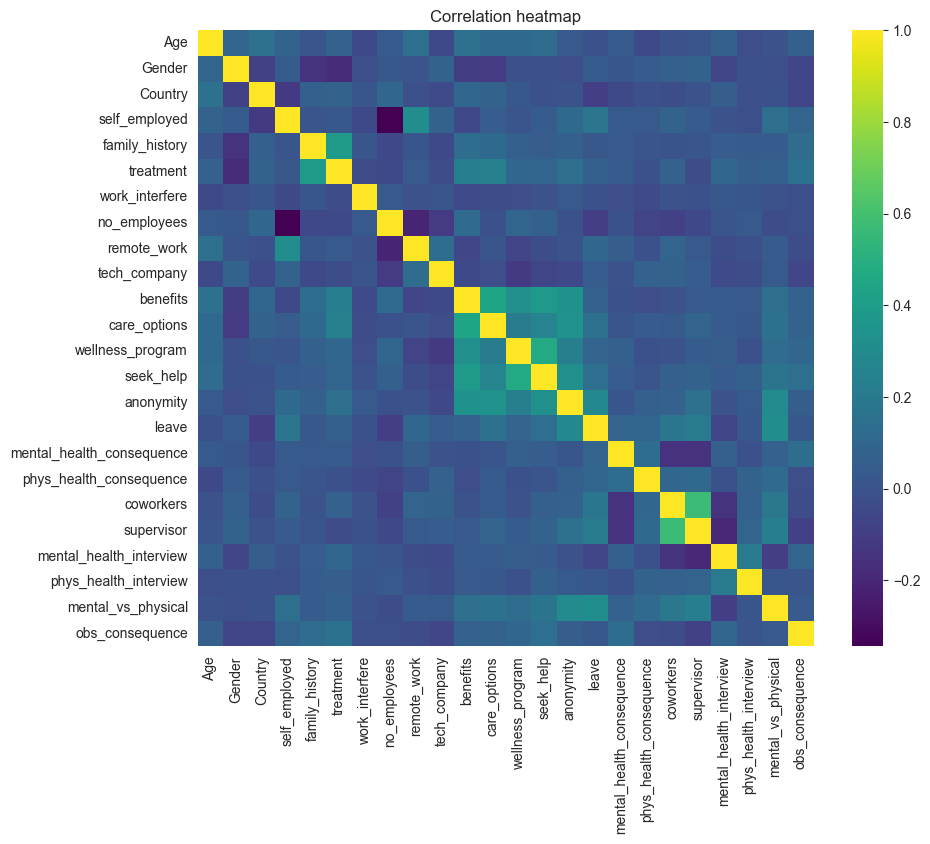

In [27]:
# Inspecting the correlation between all variables : 
corr = df.corr() 
# viuslizing it as a heatmap : 
plt.figure(figsize=(10 , 8)) 
sns.heatmap(corr , cmap='viridis' , square=True)
plt.title('Correlation heatmap')
plt.show()

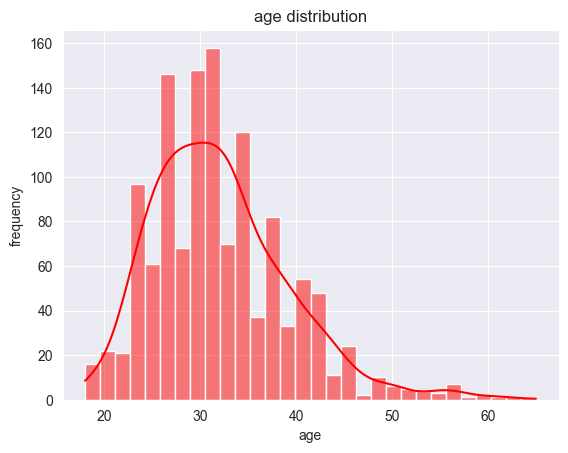

In [28]:
# Understanding the age distribution of the participants in the  survey : 
sns.set_style('darkgrid') 
sns.histplot(x='Age' , data=df , bins=30 , kde=True , color='red')
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

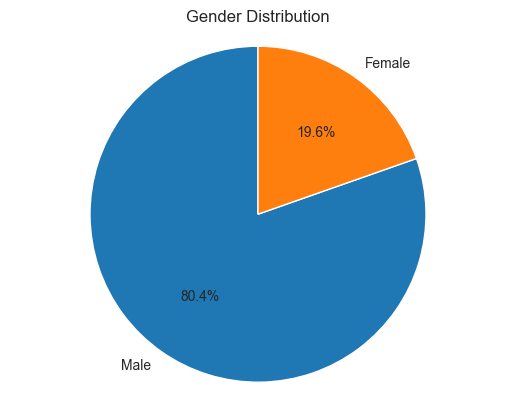

In [29]:
# understanding the gender distribution of the participants in the survey :  
sns.set_style('darkgrid')
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal') 
plt.show()


<Figure size 1000x600 with 0 Axes>

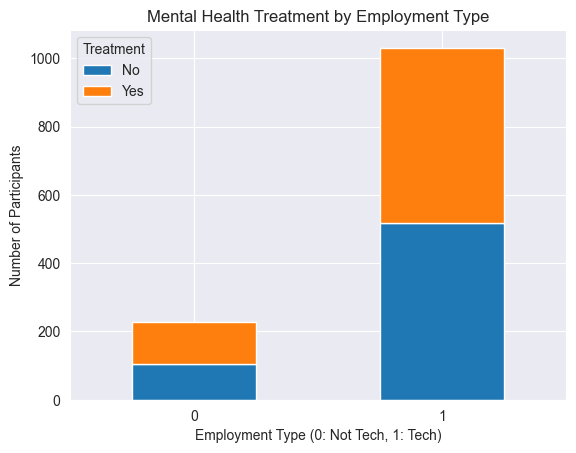

In [30]:
plt.figure(figsize=(10, 6))
treatment_employment = df.groupby(['tech_company', 'treatment']).size().unstack()
treatment_employment.plot(kind='bar', stacked=True)
plt.title('Mental Health Treatment by Employment Type')
plt.xlabel('Employment Type (0: Not Tech, 1: Tech)')
plt.ylabel('Number of Participants')
plt.xticks(rotation=0)
plt.legend(title='Treatment', labels=['No', 'Yes'])
plt.show()


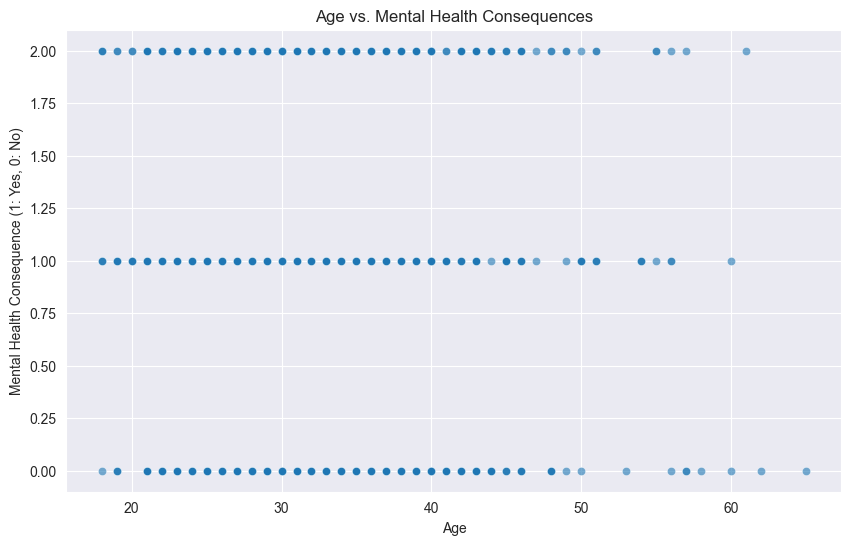

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='mental_health_consequence', alpha=0.6)
plt.title('Age vs. Mental Health Consequences')
plt.xlabel('Age')
plt.ylabel('Mental Health Consequence (1: Yes, 0: No)')
plt.show()


<Figure size 1000x600 with 0 Axes>

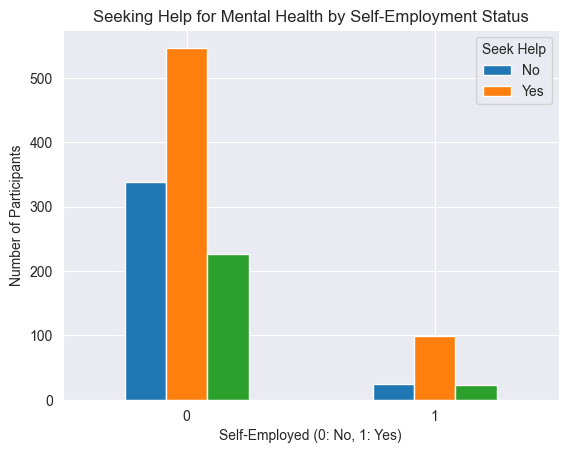

In [32]:
plt.figure(figsize=(10, 6))
self_employed_help = df.groupby('self_employed')['seek_help'].value_counts().unstack()
self_employed_help.plot(kind='bar')
plt.title('Seeking Help for Mental Health by Self-Employment Status')
plt.xlabel('Self-Employed (0: No, 1: Yes)')
plt.ylabel('Number of Participants')
plt.xticks(rotation=0)
plt.legend(title='Seek Help', labels=['No', 'Yes'])
plt.show()


## Part 5 - scaling and fitting 

Feature Scaling
We will scale the "age" feature because its range of values is significantly different from the others, which could introduce imbalance in the analysis.
> **Note**: Scaling is important because it can affect the performance of certain machine learning algorithms, especially those based on distance (e.g., k-nearest neighbors, SVM), by amplifying or reducing the impact of features with extreme values.


In [33]:
# Scaling Age
# We use MinMaxScaler to scale the "Age" feature so that its values fall between 0 and 1.
scaler = MinMaxScaler()

# We apply the scaler to the "Age" column of the training dataset.
df['Age'] = scaler.fit_transform(df[['Age']])

# Display the first few rows of the modified dataset to verify the scaling.
df.head()


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0.404255,0,45,0,0,1,1,4,0,1,...,2,2,1,1,1,2,1,0,2,0
1,0.553191,1,45,0,0,0,2,5,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0.297872,1,7,0,0,0,2,4,0,1,...,0,1,1,1,2,2,2,2,1,0
3,0.276596,1,44,0,1,1,1,2,0,1,...,1,1,2,2,1,0,0,0,1,1
4,0.276596,1,45,0,0,0,0,1,1,1,...,0,0,1,1,1,2,2,2,0,0


Splitting the Dataset                                                                                                                        
We will divide the dataset into training and testing sets. This separation is essential to evaluate our model's performance on unseen data, helping us understand how well it generalizes.


In [34]:
# Define feature columns for predictors (X) and target (y)
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = df[feature_cols]
y = df.treatment

# Split data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0 , stratify = y)

# Initialize dictionaries to store accuracy scores for each model
# These dictionaries will be used to plot final comparison graphs
methodDict = {}  # For accuracy scores of each model
rmseDict = {}    # Placeholder for root mean square error (if used)


Building a Random Forest to Compute Feature Importances
We are using an `ExtraTreesClassifier` to identify which features contribute most to predicting the target variable (`treatment`). By analyzing feature importance, we can understand which variables have the strongest influence on our model's decisions, potentially leading to more efficient and interpretable models.


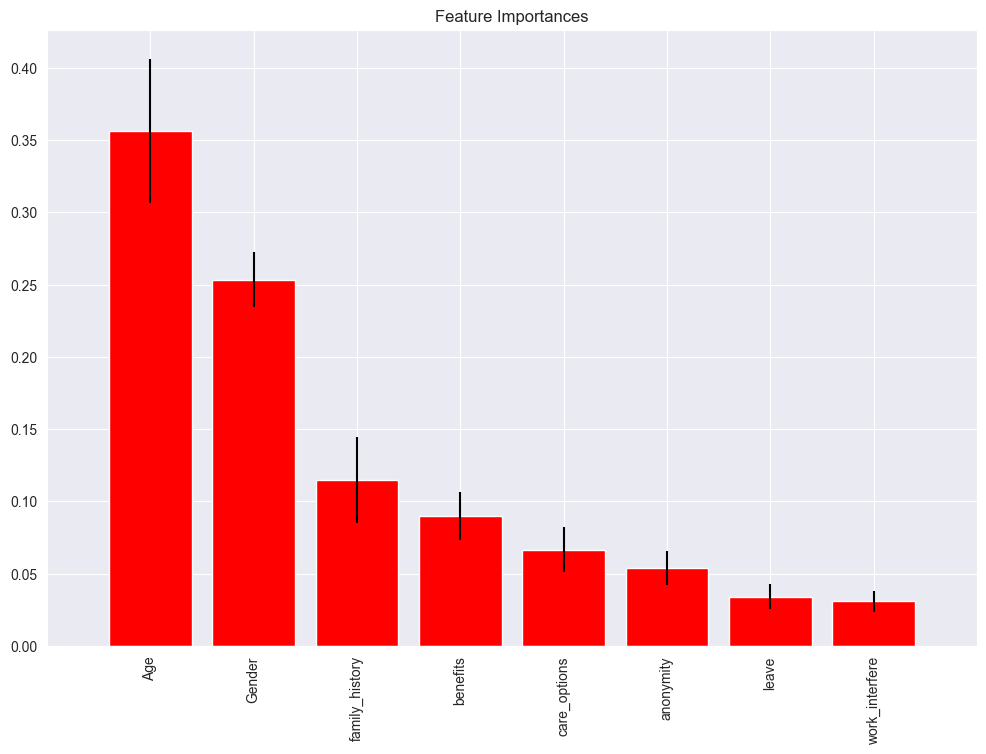

In [35]:
# Build an Extra Trees Classifier with 250 trees
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)

# Fit the model to the full dataset to compute feature importances
forest.fit(X, y)

# Get the feature importances
importances = forest.feature_importances_

# Calculate the standard deviation of feature importances across all trees
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

# Sort the features by their importance scores in descending order
indices = np.argsort(importances)[::-1]

# Prepare labels for the plot
labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])      

# Plot the feature importances of the Extra Trees Classifier
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()


## Part 6 - Tuning


### Model Evaluation
This function evaluates the performance of the classification model using several metrics, including accuracy, precision, and the confusion matrix. Additionally, it visualizes the confusion matrix and plots the ROC curve to assess the model's discriminatory power.



### Hyperparameter Tuning with Cross-Validation Score
To improve model performance, we’ll use cross-validation to test different hyperparameters and select the best combination. Cross-validation helps ensure that our model generalizes well by evaluating it on multiple folds of the data. Here, we'll focus on tuning the `ExtraTreesClassifier` to maximize accuracy.

In [36]:
##########################################
# Tuning with cross-validation score
##########################################
def tuningCV(knn):
    
    # Define the range of K values to test
    k_range = list(range(1, 31))
    k_scores = []  # List to store cross-validated accuracy scores for each K
    
    # Loop through each value of K in the range
    for k in k_range:
        # Initialize KNN with the current number of neighbors (k)
        knn = KNeighborsClassifier(n_neighbors=k)
        
        # Perform 10-fold cross-validation and compute the average accuracy score
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    
    # Print the cross-validated scores for each K
    print(k_scores)
    
    # Plot K values (x-axis) against their corresponding cross-validated accuracy (y-axis)
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.title('K-Nearest Neighbors Tuning with Cross-Validation')
    plt.show()


### Hyperparameter Tuning for K-Nearest Neighbors (KNN) using GridSearchCV
We’ll use `GridSearchCV` to automate the search for the optimal number of neighbors (`K`) for the K-Nearest Neighbors (KNN) classifier. `GridSearchCV` performs an exhaustive search over the specified parameter values and evaluates each configuration using cross-validation, which helps to efficiently find the best parameters for our model.


In [37]:
from sklearn.model_selection import GridSearchCV
def tuningGridSearch(knn):
    # More efficient parameter tuning using GridSearchCV
    # Define the range of K values to search
    k_range = list(range(1, 31))
    print("K range:", k_range)
    
    # Create a parameter grid: map the parameter name 'n_neighbors' to the list of K values
    param_grid = dict(n_neighbors=k_range)
    print("Parameter grid:", param_grid)
    
    # Instantiate GridSearchCV with KNN, parameter grid, 10-fold CV, and accuracy scoring
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

    # Fit the grid with data to perform the search
    grid.fit(X, y)
    
    # Display the complete results (list of named tuples containing all scores)
    print("Grid scores (first entry):", grid.cv_results_['params'][0])
    print("Validation scores (first entry):", grid.cv_results_['mean_test_score'][0])

    # Create a list of mean cross-validated scores for each K
    grid_mean_scores = grid.cv_results_['mean_test_score']
    print("Mean cross-validated scores for each K:", grid_mean_scores)
    
    # Plot the mean cross-validated accuracy as a function of K
    plt.plot(k_range, grid_mean_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.title('Grid Search for K-Nearest Neighbors')
    plt.show()
    
    # Examine the best model and display its score and parameters
    print("GridSearch Best Score:", grid.best_score_)
    print("GridSearch Best Params:", grid.best_params_)
    print("GridSearch Best Estimator:", grid.best_estimator_)


### Hyperparameter Tuning with RandomizedSearchCV
Instead of testing all possible combinations of parameters like `GridSearchCV`, `RandomizedSearchCV` samples a fixed number of parameter settings from the specified distributions. This approach can be more efficient when there are many hyperparameters to tune, as it reduces computation time by focusing on a random subset of possible configurations.


In [38]:

def tuningRandomizedSearchCV(model, param_dist):
    # Randomized hyperparameter search with cross-validation
    # `n_iter` controls the number of different combinations to try
    rand = RandomizedSearchCV(model, param_distributions=param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    
    # Fit the RandomizedSearchCV to the data
    rand.fit(X, y)
    
    # Access the best score and parameters found during the search
    print("Randomized Search Best Score:", rand.best_score_)
    print("Randomized Search Best Params:", rand.best_params_)
    
    # Run RandomizedSearchCV 20 times (each with n_iter=10) to observe variations in the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_distributions=param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    
    # Display the best scores from each iteration
    print("Best Scores from 20 Randomized Searches:", best_scores)


## Part 7 - Evaluating models

##### Logistic Regression
We will train a Logistic Regression model on our training dataset. Logistic Regression is a widely used statistical method for binary classification problems. After training, we'll make predictions on the test set and evaluate the model's performance using accuracy.


In [39]:

def logisticRegression(): 
    # Train a logistic regression model on the training set
    logreg = LogisticRegression()  # Increase max_iter for convergence if needed
    logreg.fit(X_train, y_train)
    
    # Make class predictions for the testing set
    y_pred_class = logreg.predict(X_test)
    y_pred_prob = logreg.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

    # Print the metrics
    print('########### Logistic Regression ###############')
    
    # Calculate accuracy, precision, recall, and F1 score
    accuracy = accuracy_score(y_test, y_pred_class)
    precision = precision_score(y_test, y_pred_class)
    recall = recall_score(y_test, y_pred_class)
    f1 = f1_score(y_test, y_pred_class)
    
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_class))

    #roc and classification rapport et confusionMatrix metrics
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_class)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_class))

    # Store the accuracy score in the method dictionary for final graph plotting
    methodDict['Log. Regres.'] = accuracy * 100   


########### Logistic Regression ###############
Accuracy: 71.43%
Precision: 0.75
Recall: 0.66
F1 Score: 0.70

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.77      0.73       187
           1       0.75      0.66      0.70       191

    accuracy                           0.71       378
   macro avg       0.72      0.71      0.71       378
weighted avg       0.72      0.71      0.71       378



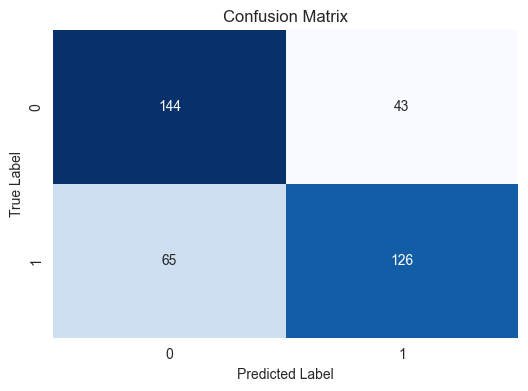

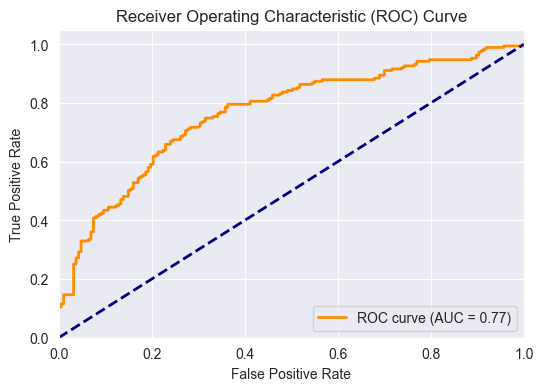


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.77      0.73       187
           1       0.75      0.66      0.70       191

    accuracy                           0.71       378
   macro avg       0.72      0.71      0.71       378
weighted avg       0.72      0.71      0.71       378



In [40]:
logisticRegression()

##### KNeighbors Classifier

In [41]:
def Knn():
    # Initialize KNeighborsClassifier with a default number of neighbors
    knn = KNeighborsClassifier(n_neighbors=5)
    
    # Define the parameter values to be searched for tuning
    k_range = list(range(1, 31))  # Range of neighbors from 1 to 30
    weight_options = ['uniform', 'distance']  # Weight options for KNN
    
    # Specify parameter distributions for RandomizedSearchCV
    param_dist = dict(n_neighbors=k_range, weights=weight_options)
    
    # Perform randomized search for the best parameters
    tuningRandomizedSearchCV(knn, param_dist)
    
    knn.fit(X_train, y_train)
    
    # Make class predictions for the testing set
    y_pred_class = knn.predict(X_test)
    
    print('########### KNeighborsClassifier ###############')
    
    # Calculate accuracy directly
    accuracy = accuracy_score(y_test, y_pred_class)  # Use accuracy_score to calculate accuracy
    
    print(f'Accuracy: {accuracy * 100:.2f}%')  # Print accuracy as a percentage
    
    # Store the accuracy score in the method dictionary for final graph plotting
    methodDict['KNN'] = accuracy * 100

In [42]:
Knn()

Randomized Search Best Score: 0.7902666666666667
Randomized Search Best Params: {'weights': 'distance', 'n_neighbors': 16}
Best Scores from 20 Randomized Searches: [0.791, 0.79, 0.786, 0.791, 0.789, 0.791, 0.792, 0.791, 0.791, 0.786, 0.792, 0.792, 0.789, 0.792, 0.787, 0.792, 0.788, 0.789, 0.786, 0.789]
########### KNeighborsClassifier ###############
Accuracy: 75.13%


#### Decision Tree classifier

In [43]:
def DT():
    # Initialize DecisionTreeClassifier
    tree = DecisionTreeClassifier()
    
    # Get the number of features to use in hyperparameter tuning
    featuresSize = len(feature_cols)
    
    # Define parameter distributions for RandomizedSearchCV
    param_dist = {
        "max_depth": [3, None],  # Test for specific max depths and no limit
        "max_features": randint(1, featuresSize),  # Randomly sample number of features
        "min_samples_split": randint(2, 9),  # Randomly sample minimum samples required to split
        "min_samples_leaf": randint(1, 9),  # Randomly sample minimum samples required at leaf node
        "criterion": ["gini", "entropy"]  # Test for different criteria
    }
    
    # Perform randomized search for the best parameters
    tuningRandomizedSearchCV(tree, param_dist)
    
    # Train a decision tree model on the training set with optimal parameters found
    best_max_depth = 3  # Example best value, replace with actual best from tuning
    best_min_samples_split = 8  # Example best value
    best_max_features = 6  # Example best value
    best_criterion = 'entropy'  # Example best criterion
    best_min_samples_leaf = 7  # Example best value
    
    tree = DecisionTreeClassifier(
        max_depth=best_max_depth,
        min_samples_split=best_min_samples_split,
        max_features=best_max_features,
        criterion=best_criterion,
        min_samples_leaf=best_min_samples_leaf
    )
    tree.fit(X_train, y_train)
    
    # Make class predictions for the testing set
    y_pred_class = tree.predict(X_test)
    
    print('########### Tree Classifier ###############')
    
    # Calculate accuracy directly
    accuracy = accuracy_score(y_test, y_pred_class)  # Use accuracy_score to calculate accuracy
    
    print(f'Accuracy: {accuracy * 100:.2f}%')  # Print accuracy as a percentage
    
    # Store the accuracy score in the method dictionary for final graph plotting
    methodDict['Tree clas.'] = accuracy * 100

In [44]:
DT()

Randomized Search Best Score: 0.831568253968254
Randomized Search Best Params: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 6, 'min_samples_split': 4}
Best Scores from 20 Randomized Searches: [0.793, 0.793, 0.818, 0.827, 0.813, 0.807, 0.831, 0.823, 0.832, 0.831, 0.828, 0.832, 0.83, 0.83, 0.824, 0.821, 0.816, 0.83, 0.803, 0.831]
########### Tree Classifier ###############
Accuracy: 80.95%


#### Random Forests

In [45]:
def rf():
    # Initialize RandomForestClassifier with a default number of estimators
    forest = RandomForestClassifier(n_estimators=20)

    # Get the number of features to use in hyperparameter tuning
    featuresSize = len(feature_cols)
    
    # Define parameter distributions for RandomizedSearchCV
    param_dist = {
        "max_depth": [3, None],  # Test for specific max depths and no limit
        "max_features": randint(1, featuresSize),  # Randomly sample number of features
        "min_samples_split": randint(2, 9),  # Randomly sample minimum samples required to split
        "min_samples_leaf": randint(1, 9),  # Randomly sample minimum samples required at leaf node
        "criterion": ["gini", "entropy"]  # Test for different criteria
    }
    
    # Perform randomized search for the best parameters
    tuningRandomizedSearchCV(forest, param_dist)
    
    # Train a RandomForestClassifier model on the training set with optimal parameters found
    best_max_depth = None  # Example best value, replace with actual best from tuning
    best_min_samples_leaf = 8  # Example best value
    best_min_samples_split = 2  # Example best value
    best_n_estimators = 20  # Example best value
    best_random_state = 1  # Example random state
    
    forest = RandomForestClassifier(
        max_depth=best_max_depth,
        min_samples_leaf=best_min_samples_leaf,
        min_samples_split=best_min_samples_split,
        n_estimators=best_n_estimators,
        random_state=best_random_state
    )
    
    # Fit the model
    my_forest = forest.fit(X_train, y_train)
    
    # Make class predictions for the testing set
    y_pred_class = my_forest.predict(X_test)
    
    print('########### Random Forests ###############')
    
    # Calculate accuracy directly
    accuracy = accuracy_score(y_test, y_pred_class)  # Use accuracy_score to calculate accuracy
    
    print(f'Accuracy: {accuracy * 100:.2f}%')  # Print accuracy as a percentage
    
    # Store the accuracy score in the method dictionary for final graph plotting
    methodDict['R. Forest'] = accuracy * 100

In [46]:
rf()

Randomized Search Best Score: 0.8307746031746032
Randomized Search Best Params: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 7, 'min_samples_split': 8}
Best Scores from 20 Randomized Searches: [0.831, 0.82, 0.831, 0.831, 0.831, 0.822, 0.83, 0.831, 0.831, 0.831, 0.831, 0.831, 0.831, 0.832, 0.831, 0.831, 0.829, 0.831, 0.831, 0.832]
########### Random Forests ###############
Accuracy: 80.69%


### SVM (Sami)

In [47]:

def SVM():
    # Initialize SVM classifier
    svm = SVC()

    # Define parameter distributions for RandomizedSearchCV
    param_dist = {
        "C": uniform(0.1, 10),  # Continuous range for C (regularization parameter)
        "kernel": ["linear", "rbf", "poly", "sigmoid"],  # Different kernel types
        "gamma": ["scale", "auto"],  # Gamma values
    }

    # Perform randomized search for the best parameters
    tuning = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=10, cv=5, scoring="accuracy", random_state=42)
    tuning.fit(X_train, y_train)

    # Retrieve the best parameters from tuning
    best_params = tuning.best_params_


    # Train the SVM model with optimal parameters found
    svm = SVC(class_weight='balanced',C=best_params["C"], kernel=best_params["kernel"], gamma=best_params["gamma"])
    svm.fit(X_train, y_train)

    # Make class predictions for the testing set
    y_pred_class = svm.predict(X_test)

    print('########### SVM Classifier ###############')

    # Calculate accuracy directly
    accuracy = accuracy_score(y_test, y_pred_class)

    print(f'Accuracy: {accuracy * 100:.2f}%')

    # Store the accuracy score in the method dictionary for final graph plotting
    methodDict['SVM'] = accuracy * 100


In [48]:
SVM()

########### SVM Classifier ###############
Accuracy: 80.69%


### XGBoost Classifier 

#### Bagging with RandomForestClassifier

In [49]:

def baggingRf():
    # Building and fitting with RandomForestClassifier
    bag = BaggingClassifier(RandomForestClassifier(), n_estimators=150, random_state=42)
    bag.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = bag.predict(X_test)
    
    print('########### Bagging with RandomForestClassifier ###############')
    
    # Calculate accuracy directly
    accuracy = accuracy_score(y_test, y_pred_class)

    print(f'Bagging Model (Random Forest) Accuracy: {accuracy * 100:.2f}%')

    # Store the accuracy score in the method dictionary for final graph plotting
    methodDict['BaggingRf'] = accuracy * 100


In [50]:
baggingRf()

########### Bagging with RandomForestClassifier ###############
Bagging Model (Random Forest) Accuracy: 80.42%


#### Bagging with DecisionTreeClassifier

In [51]:

def baggingDt():
    # Building and fitting with DecisionTreeClassifier
    bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=150, random_state=42)
    bag.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = bag.predict(X_test)
    
    print('########### Bagging with DecisionTreeClassifier ###############')
    
    # Calculate accuracy directly
    accuracy = accuracy_score(y_test, y_pred_class)

    print(f'Bagging Model (Decision Trees) Accuracy: {accuracy * 100:.2f}%')

    # Store the accuracy score in the method dictionary for final graph plotting
    methodDict['BaggingDt'] = accuracy * 100

In [52]:
baggingDt()

########### Bagging with DecisionTreeClassifier ###############
Bagging Model (Decision Trees) Accuracy: 78.31%


#### Boosting with XGBClassifier

In [53]:

def boostingXGB():
    # Initialize XGBoost classifier
    xgb_model = XGBClassifier(max_depth=6, learning_rate=0.1 , eval_metric='logloss', n_estimators=15, n_jobs=-1)
    # Train the model and fitting
    xgb_model.fit(X_train, y_train)

    # Make predictions on the test set
    xgb_pred = xgb_model.predict(X_test)

    print('########### Boosting with XGBClassifier ###############')

    # Evaluate the model's accuracy
    xgb_accuracy = accuracy_score(y_test, xgb_pred)

    print(f'Boosting Model (XGBClassifier) Accuracy: {xgb_accuracy * 100:.2f}%')

    # Store the accuracy score in the method dictionary for final graph plotting
    methodDict['BoostingXGB'] = xgb_accuracy * 100

In [54]:
boostingXGB()

########### Boosting with XGBClassifier ###############
Boosting Model (XGBClassifier) Accuracy: 81.75%


#### Boosting with AdaBoostClassifier

In [55]:

def boostingADABoost():
    # Initialize AdaBoost classifier
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
    ada_model = AdaBoostClassifier(clf ,learning_rate=0.9,n_estimators=150)

    # Train the model and fitting
    ada_model.fit(X_train, y_train)

    # Make predictions on the test set
    ada_pred = ada_model.predict(X_test)

    print('########### Boosting with AdaBoostClassifier ###############')

    # Evaluate the model's accuracy
    ada_accuracy = accuracy_score(y_test, ada_pred)

    print(f'Boosting Model (AdaBoostClassifier) Accuracy: {ada_accuracy * 100:.2f}%')

    # Store the accuracy score in the method dictionary for final graph plotting
    methodDict['BoostingADABoost'] = ada_accuracy * 100

In [56]:
boostingADABoost()

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


########### Boosting with AdaBoostClassifier ###############
Boosting Model (AdaBoostClassifier) Accuracy: 81.48%


## Part 8 - Predicting with Neural Network

### Create input functions
You must create input functions to supply data for training, evaluating, and prediction.

In [57]:
batch_size = 100
train_steps = 1000

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

def train_input_fn(features, labels, batch_size):
    """An input function for training"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle, repeat, and batch the examples.
    return dataset.shuffle(1000).repeat().batch(batch_size)

def eval_input_fn(features, labels, batch_size):
    """An input function for evaluation or prediction"""
    features=dict(features)
    if labels is None:
        # No labels, use only features.
        inputs = features
    else:
        inputs = (features, labels)

    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices(inputs)

    # Batch the examples
    assert batch_size is not None, "batch_size must not be None"
    dataset = dataset.batch(batch_size)

    # Return the dataset.
    return dataset



### Define the feature columns
A feature column is an object describing how the model should use raw input data from the features dictionary. When you build an Estimator model, you pass it a list of feature columns that describes each of the features you want the model to use.

In [58]:
# Define Tensorflow feature columns
age = tf.feature_column.numeric_column("Age")
gender = tf.feature_column.numeric_column("Gender")
family_history = tf.feature_column.numeric_column("family_history")
benefits = tf.feature_column.numeric_column("benefits")
care_options = tf.feature_column.numeric_column("care_options")
anonymity = tf.feature_column.numeric_column("anonymity")
leave = tf.feature_column.numeric_column("leave")
work_interfere = tf.feature_column.numeric_column("work_interfere")
feature_columns = [age, gender, family_history, benefits, care_options, anonymity, leave, work_interfere]


Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


### Instantiate an Estimator and Train ,Evaluate and Predict
Our problem is a classic classification problem. We want to predict whether a patient has to be treated or not. We'll use tf.estimator.DNNClassifier for deep models that perform multi-class classification.After That , that the model has been trained, we can get some statistics on its performance. The following code block evaluates the accuracy of the trained model on the test data.

In [59]:
# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

model = models.Sequential([
    layers.Dense(20, activation='relu', input_shape=(len(feature_columns),)),
    layers.Dense(20, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=200, batch_size=100, validation_data=(X_test, y_test), callbacks=[early_stopping])

accuracy = model.evaluate(X_test, y_test, verbose=0)[1] * 100
print(f'Best Accuracy with early stopping: {accuracy:.2f}%')
methodDict['NN DNNClasif.'] = accuracy


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.4908 - loss: 0.6970 - val_accuracy: 0.5450 - val_loss: 0.6865
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6078 - loss: 0.6739 - val_accuracy: 0.6058 - val_loss: 0.6680
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6331 - loss: 0.6551 - val_accuracy: 0.6720 - val_loss: 0.6517
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6642 - loss: 0.6384 - val_accuracy: 0.6905 - val_loss: 0.6376
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6943 - loss: 0.6240 - val_accuracy: 0.7037 - val_loss: 0.6258
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6989 - loss: 0.6110 - val_accuracy: 0.7037 - val_loss: 0.6145
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7070 - loss: 0.5986 - val_accuracy: 0.7063 - val_loss: 0.6035
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7159 - loss: 0.5868 - val_accuracy: 0.7169 - val_loss: 0.5

### Making predictions (inferring) from the trained model
We now have a trained model that produces good evaluation results. We can now use the trained model to predict whether a patient needs treatment or not.

In [60]:
# Make predictions on the training set
predictions_prob = model.predict(X_train, batch_size=batch_size)  # Get probability predictions
predicted_classes = (predictions_prob > 0.5).astype("int32")  # Convert probabilities to class labels (0 or 1)

# Set up lists to store prediction information
col1 = []  # To store indices
col2 = []  # To store predictions
col3 = []  # To store actual values

# Iterate over predictions and actual values to populate the results
for idx, true_val, prob in zip(X_train.index, y_train, predictions_prob):
    pred_class = int(prob > 0.5)  # Convert probability to predicted class (binary threshold at 0.5)
    probability = prob[0] * 100  # Convert probability to percentage
    
    col1.append(idx)            # Index
    col2.append(pred_class)      # Prediction
    col3.append(true_val)        # Expected

# Create a DataFrame to display predictions
results = pd.DataFrame({
    'index': col1,
    'prediction': col2,
    'expected': col3
})

# Display the first few rows
print(results.head())


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
   index  prediction  expected
0    825           1         0
1    905           1         1
2    579           1         1
3    367           1         1
4    615           1         1


C:\Users\HP\AppData\Local\Temp\ipykernel_13748\4244725835.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_class = int(prob > 0.5)  # Convert probability to predicted class (binary threshold at 0.5)


## Part 9 - Success method plot

In [61]:
def plotSuccess():
    s = pd.Series(methodDict)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(13,17))
    #Colors
    ax = s.plot(kind='bar') 
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([70.0, 90.0])
    plt.xlabel('Method')
    plt.ylabel('Percentage')
    plt.title('Success of methods')
     
    plt.show()

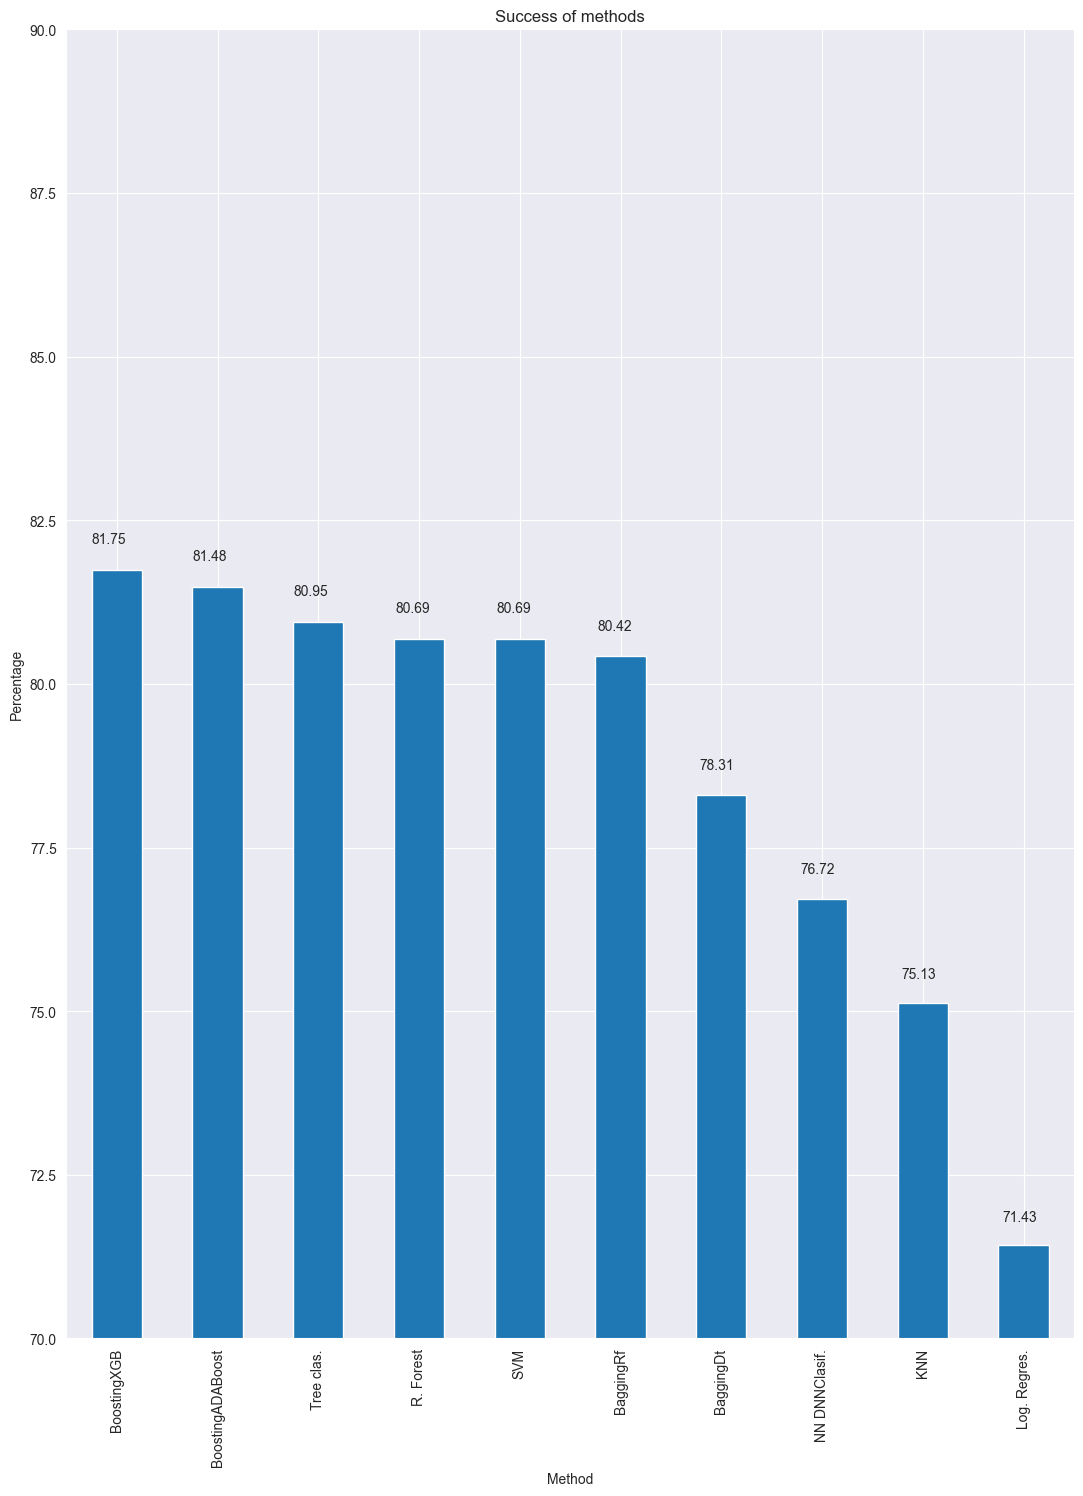

In [62]:
plotSuccess()

## Part 10 - Creating predictions on test set

In [63]:
# Generate predictions with the best method
best_model = XGBClassifier()

best_model.fit(X, y)

dfTestPredictions = best_model.predict(X_test)

# Evaluate the model's accuracy
xgb_accuracy = accuracy_score(y_test, dfTestPredictions)

print(f'Boosting Model (XGBoostClassifier) Accuracy: {xgb_accuracy * 100:.2f}%')

Boosting Model (XGBoostClassifier) Accuracy: 96.03%


#### Comparing Prediction target with real one

In [64]:
# We don't have any significative field so we save the index

results = pd.DataFrame({'Index': X_test.index, 'TreatmentPred':y_test,'Treatment': dfTestPredictions})
results.sample(10)

,Index,TreatmentPred,Treatment
729,729,1,1
862,862,0,0
1156,1156,0,0
1215,1215,0,0
333,333,1,1
893,893,0,0
829,829,1,1
299,299,0,0
863,863,1,1
501,501,0,0


## Part 11 - Submision

### Prepare Submission File
We make submissions in CSV files. Your submissions usually have two columns: an ID column and a prediction column. The ID field comes from the test data (keeping whatever name the ID field had in that data, which for our data is the index). The prediction column will use the name of the target field.

We will create a DataFrame with this data, and then use the dataframe's to_csv method to write our submission file. Explicitly include the argument index=False to prevent pandas from adding another column in our csv file.

In [65]:
# Write predictions to csv file

results = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions})

# Save to file
# This file will be visible after publishing in the output section

results.to_csv('submission.csv', index=False)

### Make Submission
Hit the blue Publish button at the top of your notebook screen. It will take some time for your kernel to run. When it has finished your navigation bar at the top of the screen will have a tab for Output. This only shows up if you have written an output file (like we did in the Prepare Submission File step).

## Part 12 - Conclusions

As a team, we conclude that achieving a success rate of over 80% across the majority of our methods is a solid benchmark, given the complexity of the data and the diverse features within it. This rate provides strong confidence in our model's ability to discern cases that may require treatment accurately.

Looking forward, our next priority is to implement a model persistence strategy. This will allow us to save the model and reuse it in future sessions without needing to retrain, which will streamline our process and improve efficiency.

Thank you for reviewing our work. We’re open to any feedback or advice that could help enhance our approach and results.